# Simple Statistical Arbitrage Strategy
In this notebook, I present a simple statistical arbitrage strategy and backtest its performance over yahoo finance data. I drew inspiration from "Learn Algorithmic Trading", Donadio and Gosh, 2019. 

In [1]:
from SimpleStatArb import SimpleStatArb
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
# loading the data

TRADING_INSTRUMENT = 'CADUSD=X'
SYMBOLS = ['AUDUSD=X', 'EURUSD=X', 'GBPUSD=X', 'NZDUSD=X', 'CHFUSD=X', 'JPYUSD=X', 'CADUSD=X']

START_DATE = '2018-01-01'
END_DATE = '2024-01-01'

try:
    prices = pd.read_csv('data/prices.csv', index_col=0)
except FileNotFoundError:
    # downloading the data
    tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'FB']
    prices = yf.download(SYMBOLS, start=START_DATE, end=END_DATE)['Adj Close']
    prices.to_csv('data/prices.csv')

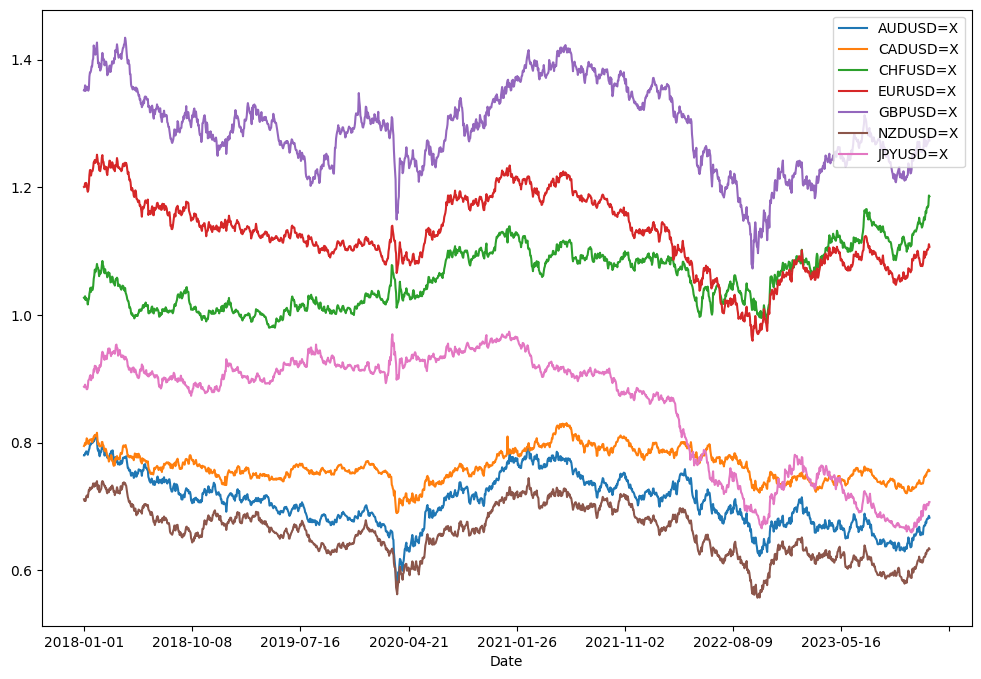

In [3]:
# plotting the different currency prices. The JPYUSD=X is multiplied by 100 to make it comparable to the other currencies.

prices.drop(columns=['JPYUSD=X']).plot(figsize=(12, 8))
plt.plot(prices['JPYUSD=X'] * 100, label='JPYUSD=X')
plt.legend()
plt.show()

In [4]:
prices.head()

,AUDUSD=X,CADUSD=X,CHFUSD=X,EURUSD=X,GBPUSD=X,JPYUSD=X,NZDUSD=X
Date,,,,,,,
2018-01-01,0.780214,0.794862,1.026979,1.200495,1.351607,0.008876,0.711389
2018-01-02,0.780104,0.796495,1.025936,1.201158,1.351132,0.008868,0.708818
2018-01-03,0.783392,0.799750,1.029379,1.206345,1.359619,0.008909,0.710021
2018-01-04,0.782840,0.797010,1.023395,1.201043,1.351132,0.008880,0.709019
2018-01-05,0.786380,0.800621,1.026273,1.206884,1.355289,0.008867,0.715599


## Let us initialize the strategy and run it over the whole period with the default parameters.

In [5]:
simple_stat_arb = SimpleStatArb(prices, TRADING_INSTRUMENT)

simple_stat_arb.run_strategy_without_risk_optimization_based_on_historical_data()

In [6]:
symbol = 'GBPUSD=X'
trading_instrument = 'CADUSD=X'
print(simple_stat_arb._correlation_history[symbol][:10])
print(simple_stat_arb._std_dev_price_deviation_history[trading_instrument][:10])
print(simple_stat_arb._std_dev_price_deviation_history[symbol][:10])
print(simple_stat_arb._price_deviation_from_sma_history[trading_instrument][:10])
print(simple_stat_arb._price_deviation_from_sma_history[symbol][:10])

[]
[]
[1.4835690675834699e-05, 0.0009183758271957172, 0.0013565497529857043, 0.001623590767889828, 0.0020697078185690334, 0.0019004538014071547, 0.002596104099968275, 0.002617707226650002, 0.00329372990958745, 0.004863754022810348]


TypeError: sequence index must be integer, not 'slice'

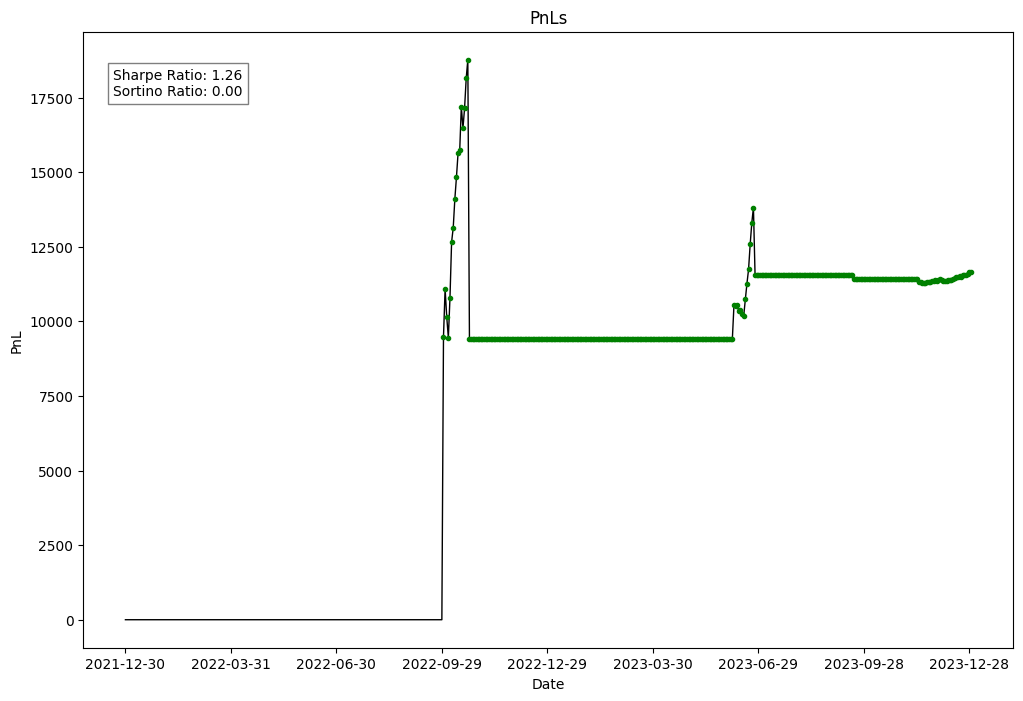

In [ ]:
simple_stat_arb.plot_pnls()

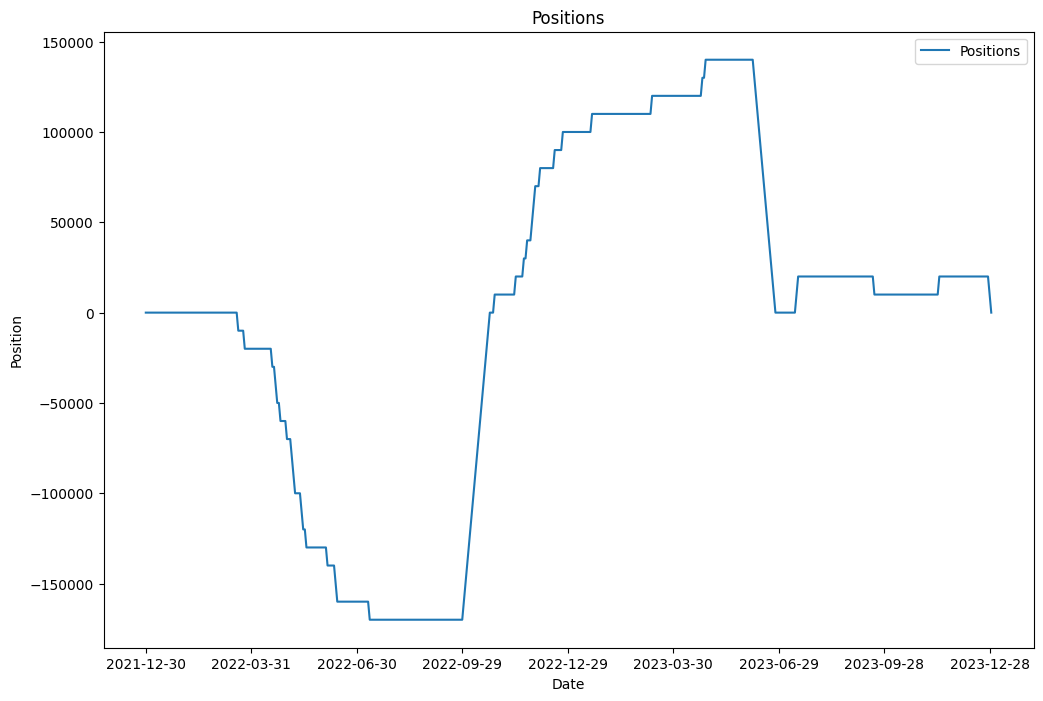

In [ ]:
simple_stat_arb.plot_positions()

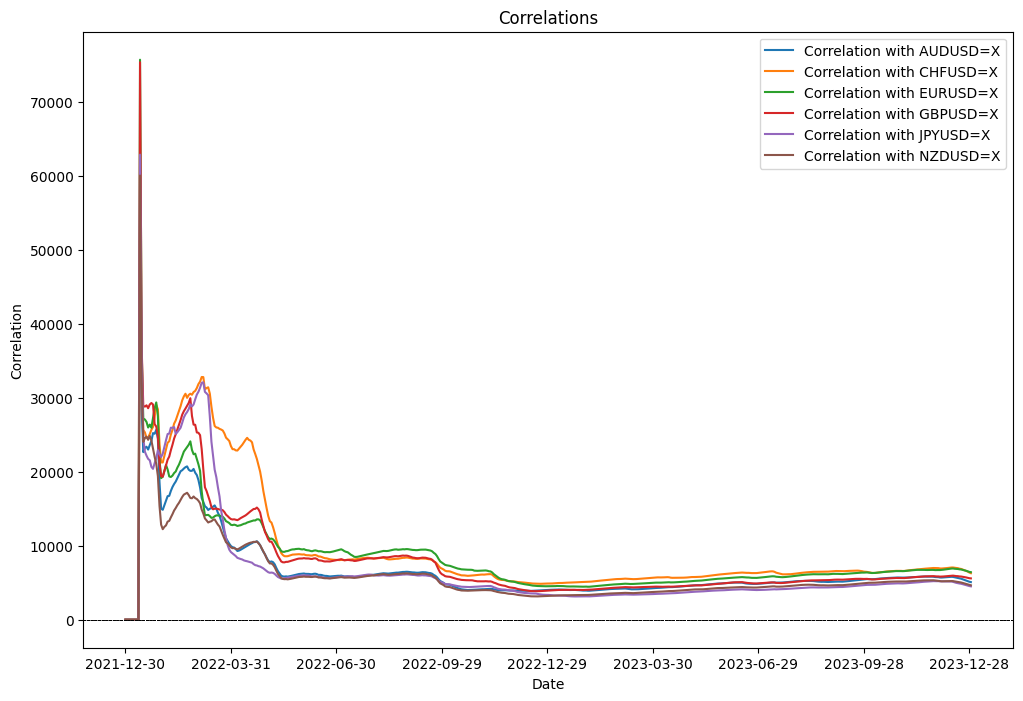

In [ ]:
simple_stat_arb.plot_correlations()

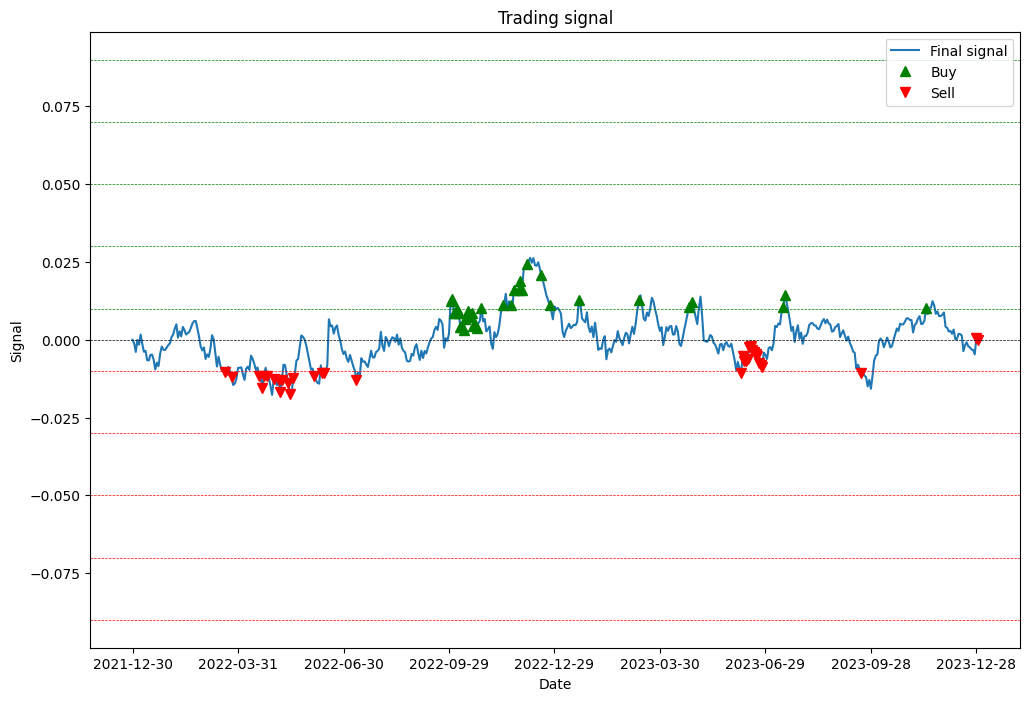

In [ ]:
simple_stat_arb.plot_trading_signal()

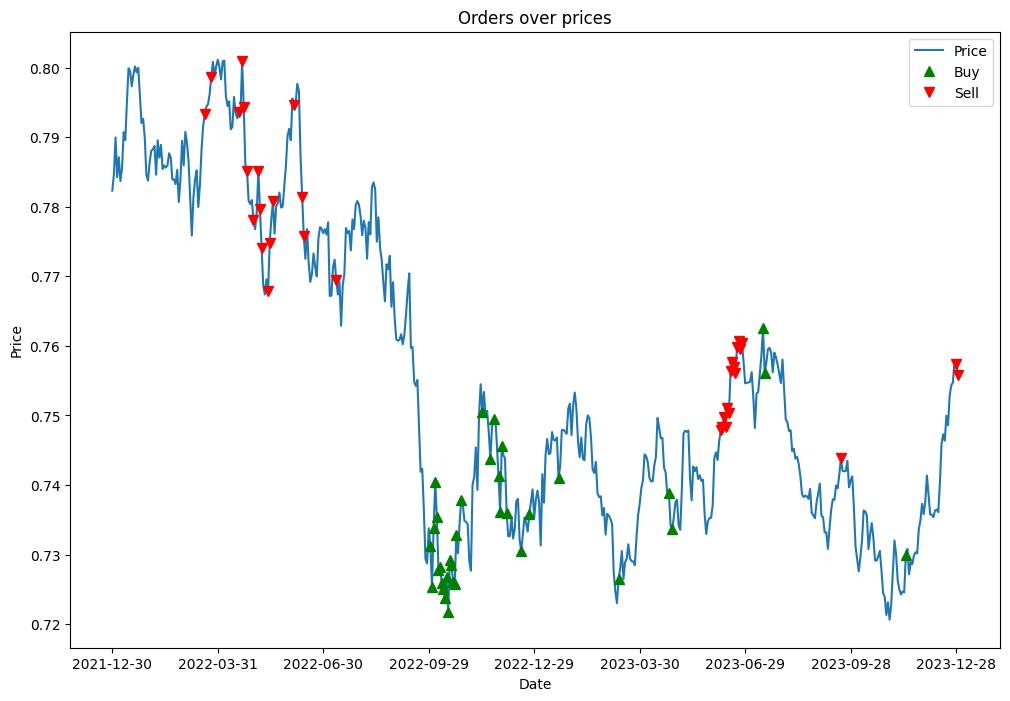

In [ ]:
simple_stat_arb.plot_orders_over_prices()